In [1]:
# Import required libraries
import pandas as pd

# Load the Excel file
df = pd.read_excel('side_effect_data 1.xlsx')

# Display the first few rows to inspect the data
print(df.head())

# Check for basic information about the dataset
df.info()

# Display summary statistics for numerical columns
print(df.describe())

   Kullanici_id Cinsiyet Dogum_Tarihi    Uyruk         Il  \
0           107     Male   1960-03-01  Turkiye  Canakkale   
1           140     Male   1939-10-12  Turkiye    Trabzon   
2             2   Female   1976-12-17  Turkiye  Canakkale   
3            83     Male   1977-06-17  Turkiye      Adana   
4             7   Female   1976-09-03  Turkiye      Izmir   

                         Ilac_Adi Ilac_Baslangic_Tarihi Ilac_Bitis_Tarihi  \
0                 trifluoperazine            2022-01-09        2022-03-04   
1                fluphenazine hcl            2022-01-09        2022-03-08   
2                 warfarin sodium            2022-01-11        2022-03-12   
3                   valproic acid            2022-01-04        2022-03-12   
4  carbamazepine extended release            2022-01-13        2022-03-06   

                Yan_Etki Yan_Etki_Bildirim_Tarihi Alerjilerim  \
0               Kabizlik      2022-02-19 18:28:43       Ceviz   
1              Yorgunluk      2022-02-03

In [ ]:
"""
Dataset Overview:

The dataset contains 2357 rows and 19 columns.
It includes both categorical (e.g., Cinsiyet, Uyruk) and numerical (e.g., Kilo, Boy) data.
There are missing values in columns such as Cinsiyet, Il, Alerjilerim, Kilo, and Boy.
Key Numerical Columns:

Kilo: Ranges from 50 to 110, with an average around 80.86 kg.
Boy: Ranges from 145 to 203 cm, with an average around 174.64 cm.
Date Columns:

Columns like Dogum_Tarihi, Ilac_Baslangic_Tarihi, Ilac_Bitis_Tarihi, and Yan_Etki_Bildirim_Tarihi are stored
as datetime objects, which is ideal for further analysis involving time-based trends.

"""

In [2]:
# Check for missing values in the dataset
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])

Cinsiyet                            778
Il                                  227
Alerjilerim                         484
Kronik Hastaliklarim                392
Baba Kronik Hastaliklari            156
Anne Kronik Hastaliklari            217
Kiz Kardes Kronik Hastaliklari       97
Erkek Kardes Kronik Hastaliklari    121
Kan Grubu                           347
Kilo                                293
Boy                                 114
dtype: int64


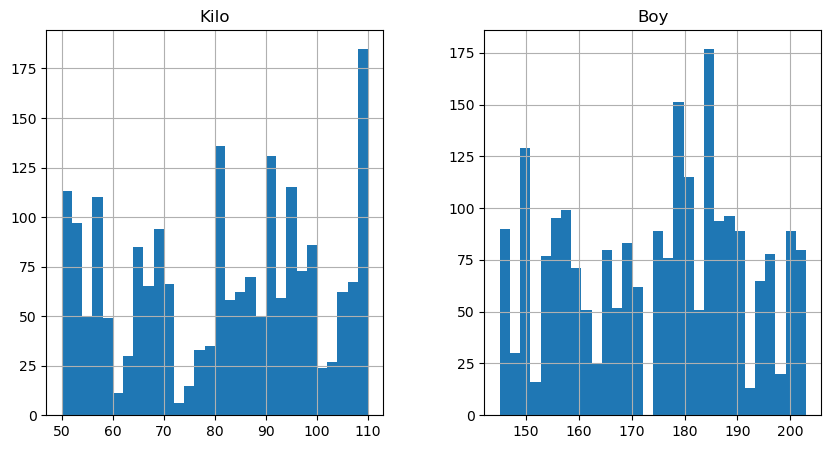

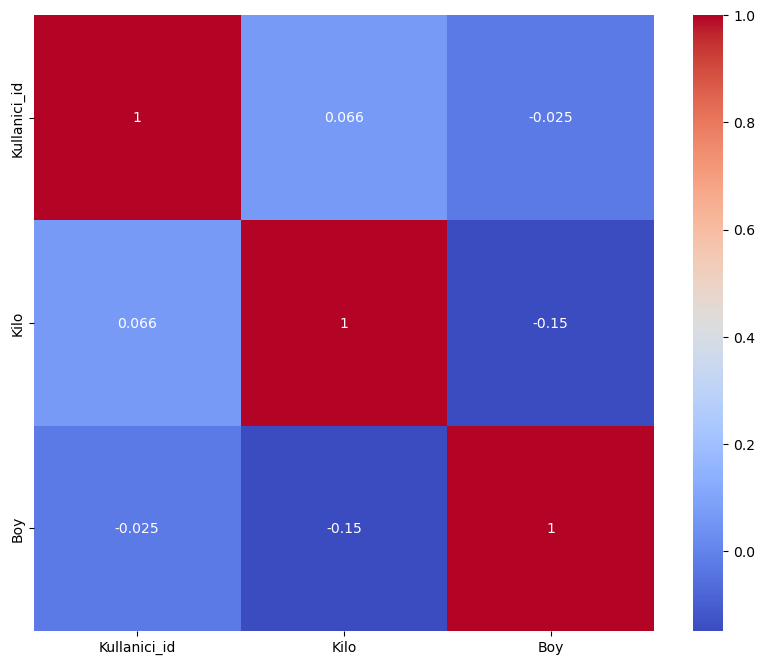

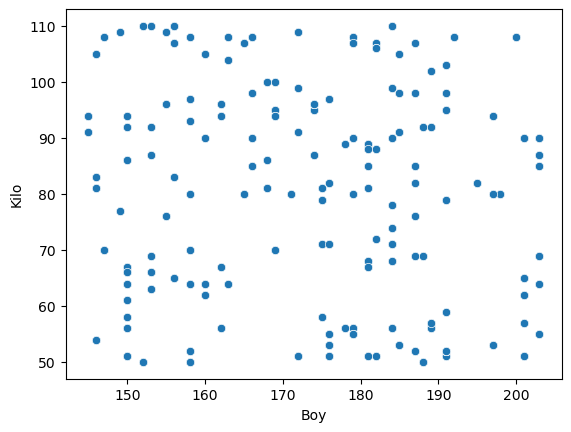

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of numerical features (Kilo, Boy)
df[['Kilo', 'Boy']].hist(bins=30, figsize=(10,5))
plt.show()

# Selecting only numerical columns for correlation
numerical_columns = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm')
plt.show()


# Scatter plot: Kilo vs Boy
sns.scatterplot(data=df, x='Boy', y='Kilo')
plt.show()

"""

In [ ]:
"""
Kilo and Boy are somewhat positively correlated, meaning that taller individuals tend
to weigh more, though the correlation is not very strong.

The scatter plot shows some variability, with certain height ranges appearing 
more frequently in specific weight bands.

Overall, the data shows typical physiological patterns, but with some variability, likely
due to the individual characteristics of the population in the dataset.
"""

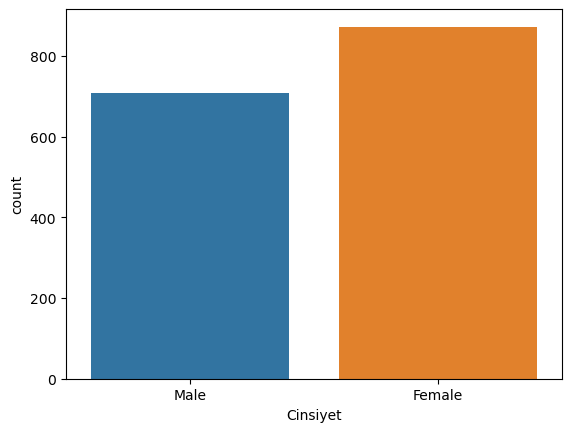

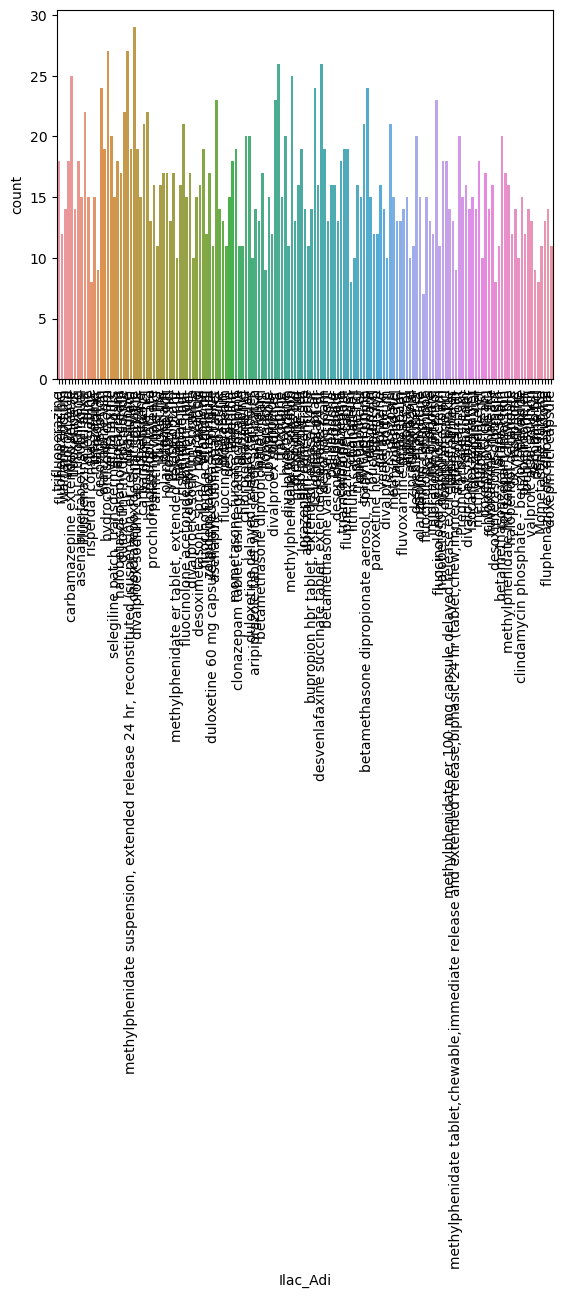

In [7]:
# Countplot for Cinsiyet (Gender)
sns.countplot(data=df, x='Cinsiyet')
plt.show()

# Bar plot for different medications (Ilac_Adi)
sns.countplot(data=df, x='Ilac_Adi')
plt.xticks(rotation=90)
plt.show()

In [8]:
import pandas as pd
import numpy as np

# STEP 3: Fill missing data

# 1. Categorical Variables: Fill missing with mode (most frequent value)
categorical_columns = ['Cinsiyet', 'Uyruk', 'Il', 'Alerjilerim', 'Kronik Hastaliklarim',
                       'Baba Kronik Hastaliklari', 'Anne Kronik Hastaliklari',
                       'Kiz Kardes Kronik Hastaliklari', 'Erkek Kardes Kronik Hastaliklari',
                       'Kan Grubu']

for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# 2. Numerical Variables: Fill missing with median
numerical_columns = ['Kilo', 'Boy']

for col in numerical_columns:
    df[col] = df[col].fillna(df[col].median())

# 3. Dates: Forward/Backward fill where applicable
date_columns = ['Ilac_Baslangic_Tarihi', 'Ilac_Bitis_Tarihi', 'Yan_Etki_Bildirim_Tarihi']

for col in date_columns:
    df[col] = df[col].fillna(method='ffill')  # Forward fill
    df[col] = df[col].fillna(method='bfill')  # Backward fill as backup

# Now, the missing data is handled.
print(df.isnull().sum())  # Check remaining missing values, if any


Kullanici_id                        0
Cinsiyet                            0
Dogum_Tarihi                        0
Uyruk                               0
Il                                  0
Ilac_Adi                            0
Ilac_Baslangic_Tarihi               0
Ilac_Bitis_Tarihi                   0
Yan_Etki                            0
Yan_Etki_Bildirim_Tarihi            0
Alerjilerim                         0
Kronik Hastaliklarim                0
Baba Kronik Hastaliklari            0
Anne Kronik Hastaliklari            0
Kiz Kardes Kronik Hastaliklari      0
Erkek Kardes Kronik Hastaliklari    0
Kan Grubu                           0
Kilo                                0
Boy                                 0
dtype: int64


In [ ]:
##EKSTRA ÇIKARABİLECEİĞİMİZ BİLGİLERİ ÇIKARALIM ŞİMDİ

In [9]:
from datetime import datetime

# Yaş hesaplama
df['Yas'] = df['Dogum_Tarihi'].apply(lambda x: datetime.now().year - x.year)

# İlaç kullanım süresi hesaplama
df['Ilac_Kullanim_Suresi'] = (df['Ilac_Bitis_Tarihi'] - df['Ilac_Baslangic_Tarihi']).dt.days

# BMI hesaplama
df['BMI'] = df['Kilo'] / (df['Boy'] / 100) ** 2

# Cinsiyet ve il için one-hot encoding
df = pd.get_dummies(df, columns=['Cinsiyet', 'Il'], drop_first=True)

# Alerji ve kronik hastalıkların sayılması
df['Alerji_Sayisi'] = df['Alerjilerim'].apply(lambda x: len(x.split(',')) if pd.notna(x) else 0)
df['Kronik_Hastalik_Sayisi'] = df['Kronik Hastaliklarim'].apply(lambda x: len(x.split(',')) if pd.notna(x) else 0)

# Yan etki kategorilendirme (örnek olarak sadece 'Yorgunluk' için bir kategori ekliyoruz)
df['Yan_Etki_Kategori'] = df['Yan_Etki'].apply(lambda x: 1 if 'Yorgunluk' in x else 0)



In [1]:
## VERİ , MAKİNE ÖĞRENMESİ ALGORİTMALARINA HAZIRDIR . 
## BUNDAN SONRAKİ ADIMLAR EĞİTİM VE TEST VERİLERİ OLUŞTURUP MAKİNE ÖĞRENMESİ ALGORİTMASINDAN GEÇİRMEKTİR